In [1]:
import numpy as np
from poke.writing import read_serial_to_rayfront
import poke.plotting as plot
# TODO: GENERATE A NEW SET OF RAYFRONTS FOR TEST_FILES

# Generate an Amplitude Response Matrix from a Rayfront
In this demo, we will plot an Amplitude Response Matrix (ARM) from data contained in a Rayfront object. The ARM is an alternative representation of the Jones pupil, to show how polarization impacts the formation of the complex field at the image plane. The ARM is computed simply from the Fourier Transform of the complex Jones pupil function

$$\textbf{ARM}(\xi,\eta) = FT[\textbf{J}(x,y)]$$

So in theory, we can compute this with any diffraction package. Let's start by calling the simple utility we have in Poke. This begins by loading up a rayfront with a jones pupil in it. Here's a file with the ELT that has a bare aluminum coating on all of the mirrors:

In [9]:
pth_to_lens = '/Users/jashcraft/Desktop/poke/tests/ELT_rayfront_aspolarized_64rays_0.6um.msgpack'
rf = read_serial_to_rayfront(pth_to_lens)

First we compute the jones pupil using the vector `a_loc=np.array([0,1,0])`

In [10]:
rf.compute_jones_pupil(aloc=np.array([0.,1.,0.]))

Next we plot the Jones pupil to make sure everything looks right

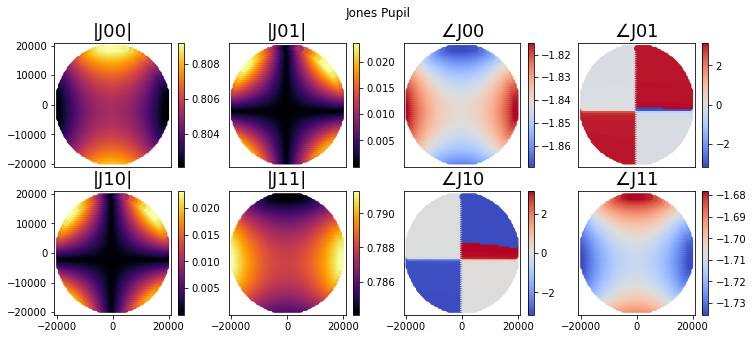

In [11]:
plot.jones_pupil(rf)

This is about what we expect for a cassegrain-type jones pupil! We are free to proceed with the computation now. Let's first start with computing the ARM using a physical optics propagation package.

`prysm` is an excellent package to start with because it requires no interface. Only that we have the data we want to transform in a numpy array. We'll call prysm later, first we need to ensure that our Jones pupil is on a regularly spaced grid.

In [13]:
from poke.interfaces import regularly_space_jones
print('poke jones pupil shape = ',rf.jones_pupil[-1].shape)
nmodes = 11
npix = 256
regular_jones = regularly_space_jones(rf,nmodes,npix)
print('regularized shape = ',regular_jones.shape)

poke jones pupil shape =  (3096, 3, 3)
regularized shape =  (256, 256, 2, 2)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])

plt.imshow(np.abs(regular_jones[...,0,0]))
plt.colorbar()